In [37]:
import pandas as pd

diabetes_data = pd.read_csv('Diabetes.csv')
inactivity_data = pd.read_csv('Physical inactivity.csv')
healthcare_spending_data = pd.read_csv('GHED_data.csv', low_memory=False)

In [38]:
diabetes_data.replace('no data', pd.NA, inplace=True)
inactivity_data.replace('no data', pd.NA, inplace=True)
healthcare_spending_data.replace('no data', pd.NA, inplace=True)

print(diabetes_data.isnull(). sum())
print(inactivity_data.isnull(). sum())
print(healthcare_spending_data.isnull(). sum())

Indicator Name               0
Cancer Type               1812
Year                         0
Country Name                 9
Region                       0
Gender                       0
Area                      1812
Numeric                     78
Lower Confidence Limit    1218
Upper Confidence Limit    1218
Comment                   1812
Unnamed: 11               1812
dtype: int64
Indicator Name               0
Cancer Type               1029
Year                         0
Country Name                 6
Region                       0
Gender                       0
Area                      1029
Numeric                      3
Lower Confidence Limit       3
Upper Confidence Limit       3
Comment                   1029
Unnamed: 11               1029
dtype: int64
country                  0
code                     0
region                   0
income                   0
year                     0
                      ... 
hk_ext_usd2021_pc     3510
hk_pvtd_usd2021_pc    3911
gdp_usd2021_pc

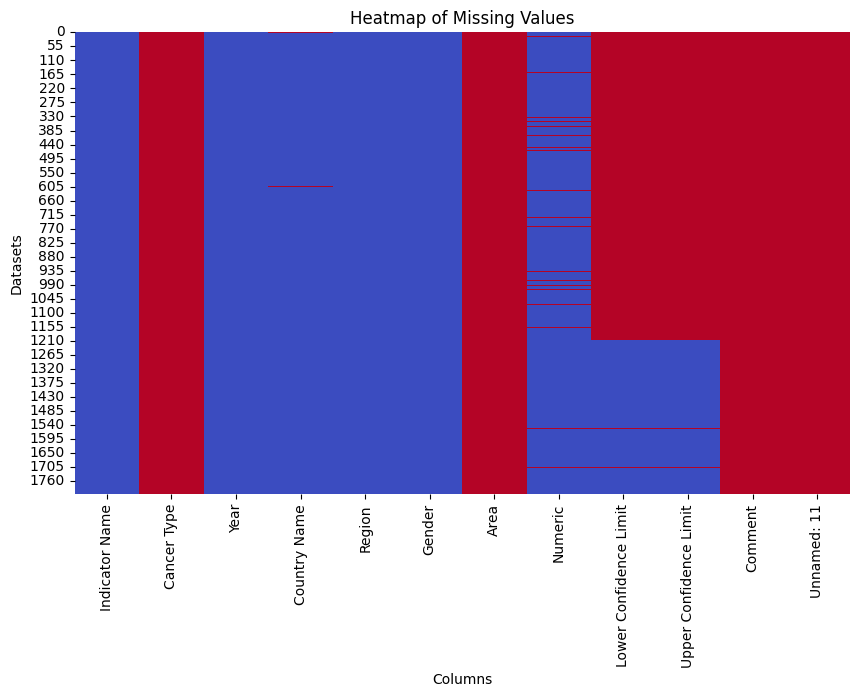

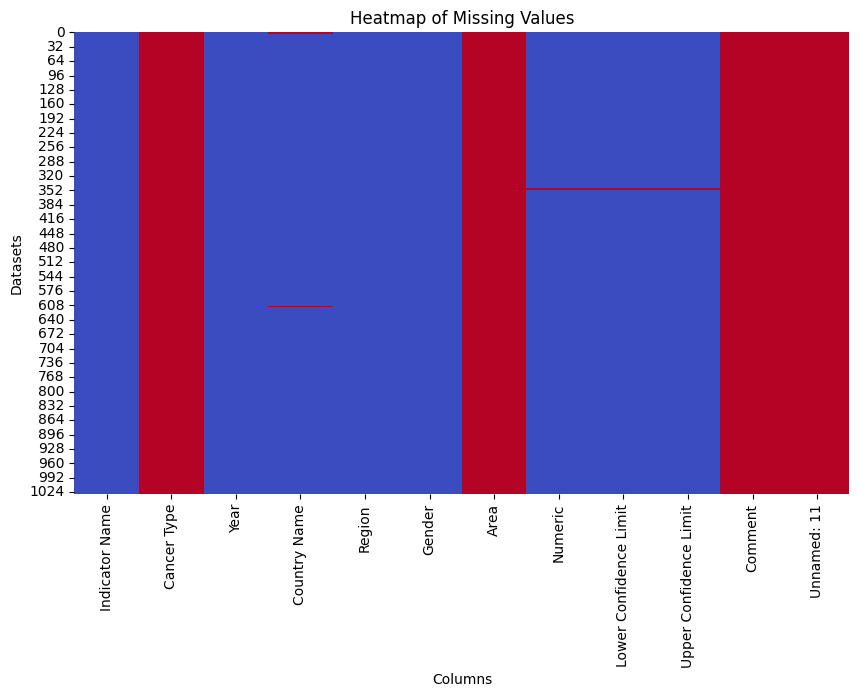

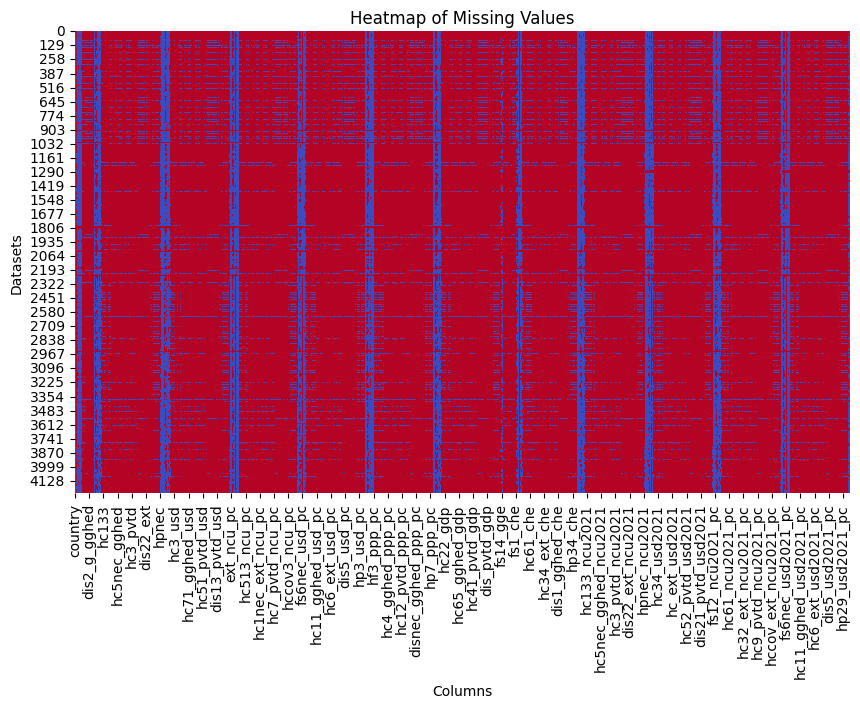

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a heatmap for missing values across datasets
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_data.isnull(), cmap='coolwarm', cbar=False)

plt.title('Heatmap of Missing Values')
plt.ylabel('Datasets')
plt.xlabel('Columns')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(inactivity_data.isnull(), cmap='coolwarm', cbar=False)

plt.title('Heatmap of Missing Values')
plt.ylabel('Datasets')
plt.xlabel('Columns')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(healthcare_spending_data.isnull(), cmap='coolwarm', cbar=False)

plt.title('Heatmap of Missing Values')
plt.ylabel('Datasets')
plt.xlabel('Columns')
plt.show()

Indicator Name     object
Year                int64
Country Name       object
Region             object
Gender             object
Numeric           float64
dtype: object


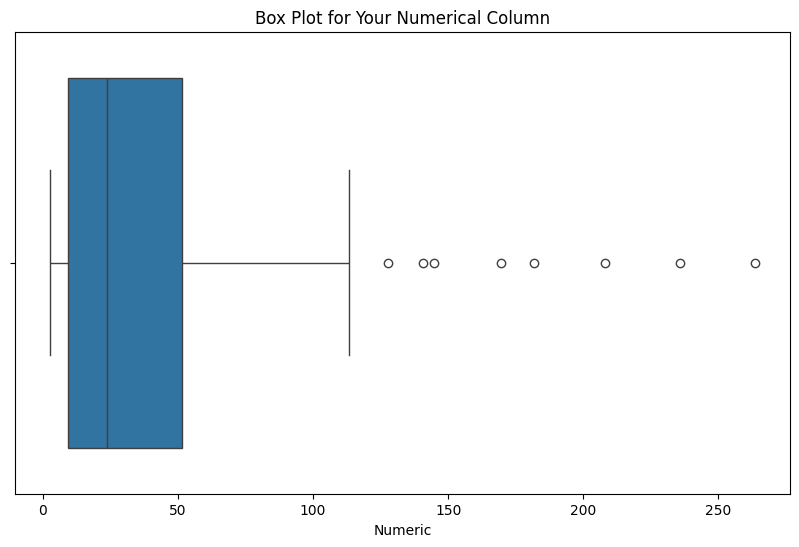

                           Indicator Name  Year  \
42   Diabetes age-standardized death rate  2019   
183  Diabetes age-standardized death rate  2019   
192  Diabetes age-standardized death rate  2019   
282  Diabetes age-standardized death rate  2019   
300  Diabetes age-standardized death rate  2019   
339  Diabetes age-standardized death rate  2019   
345  Diabetes age-standardized death rate  2019   
429  Diabetes age-standardized death rate  2019   

                         Country Name                        Region Gender  \
42                            Bahrain  Eastern Mediterranean Region  Total   
183                          Eswatini                African Region  Total   
192                              Fiji        Western Pacific Region  Total   
282                          Kiribati        Western Pacific Region  Total   
300                           Lesotho                African Region  Total   
339                         Mauritius                African Region  Tot

In [70]:
diabetes_data = pd.read_csv('Diabetes.csv')
inactivity_data = pd.read_csv('Physical inactivity.csv')
healthcare_spending_data = pd.read_csv('GHED_data.csv', low_memory=False)

diabetes_data.replace('no data', pd.NA, inplace=True)
inactivity_data.replace('no data', pd.NA, inplace=True)
healthcare_spending_data.replace('no data', pd.NA, inplace=True)

diabetes_data.dropna(axis=1, how='all', inplace=True)
diabetes_data.dropna(subset=['Country Name'], inplace=True)
diabetes_data.drop(['Lower Confidence Limit', 'Upper Confidence Limit'], axis=1, inplace=True)
diabetes_data = diabetes_data[diabetes_data['Gender'] == 'Total']
diabetes_data['Numeric'] = pd.to_numeric(diabetes_data['Numeric'], errors='coerce')
# diabetes_data = diabetes_data.dropna(how='any').reset_index(drop=True)

print(diabetes_data.dtypes) 

plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes_data, x='Numeric')  # Replace with your column name
plt.title('Box Plot for Your Numerical Column')
plt.show()

# IQR Method to identify outliers
Q1 = diabetes_data['Numeric'].quantile(0.25)  # Replace with your column name
Q3 = diabetes_data['Numeric'].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers
outliers = diabetes_data[(diabetes_data['Numeric'] < lower_bound) | (diabetes_data['Numeric'] > upper_bound)]

# Print outliers
print(outliers)

# print(diabetes_data.isnull().sum())


# inactivity_data.dropna(axis=1, how='all', inplace=True)
# inactivity_data.dropna(subset=['Country Name'], inplace=True)
# inactivity_data.drop(['Lower Confidence Limit', 'Upper Confidence Limit'], axis=1, inplace=True)
# inactivity_data = inactivity_data[inactivity_data['Gender'] == 'Total'].reset_index(drop=True)

# print(inactivity_data.isnull().sum())

# healthcare_spending_data.dropna(axis=1, how='all', inplace=True)


# plt.figure(figsize=(10, 6))
# sns.heatmap(diabetes_data.isnull(), cmap='coolwarm', cbar=False)

# plt.title('Heatmap of Missing Values in "Diabetes.csv"')
# plt.ylabel('Datasets')
# plt.xlabel('Columns')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.heatmap(inactivity_data.isnull(), cmap='coolwarm', cbar=False)

# plt.title('Heatmap of Missing Values in "Physical inactivity.csv"')
# plt.ylabel('Datasets')
# plt.xlabel('Columns')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.heatmap(healthcare_spending_data.isnull(), cmap='coolwarm', cbar=False)

# plt.title('Heatmap of Missing Values in "GHED.csv"')
# plt.ylabel('Datasets')
# plt.xlabel('Columns')
# plt.show()
